In [3]:
from google.colab import drive
drive.mount('/content/drive') #Google Driveをマウントする

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Base 
# -----------------------------------
import pandas as pd    # data processing
import numpy as np    # linear algebra
import scipy as sp
import matplotlib.pyplot as plt    # 可視化のためのモジュール
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)    # 不要な警告メッセージを出さないようにしています
from IPython.display import Image    # 画像表示のためのモジュール

# 精度評価のためのモジュールをインポート(SKLEARNはMLのためのモジュール)(組み込みデータセット)
# -----------------------------------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

# Configuration
# -----------------------------------
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

#学習データ
train = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/2022年前期東大講座/GCI/コンペ1/data/train.csv")
    
#テストデータ
test = pd.read_csv("/content/drive/MyDrive/プログラミング、AI/2022年前期東大講座/GCI/コンペ1/data/test.csv")


In [65]:
train.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,1,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [67]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
test = test.dropna(subset=['Age'])

In [69]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          245
Embarked         0
dtype: int64

In [70]:
test.shape

(332, 11)

In [71]:
# データの列の削除
test = test.drop(['Cabin'], axis = 1)

In [72]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [73]:
test.shape

(332, 10)

In [74]:
test = test.dropna()

In [75]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [76]:
test.shape

(331, 10)

In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,S


In [48]:
train = train.dropna()

In [78]:
train.isnull().sum()

PassengerId      0
Perished         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
# データの列の削除
train = train.drop(['Cabin'], axis = 1)

In [81]:
train.shape

(891, 11)

In [82]:
train = train.dropna()

In [83]:
train.isnull().sum()

PassengerId    0
Perished       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
train.shape

(712, 11)

In [85]:
# Bind rows
df = train.append(test)

In [86]:
df.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
1,2,0.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
2,3,0.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
3,4,0.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
4,5,1.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


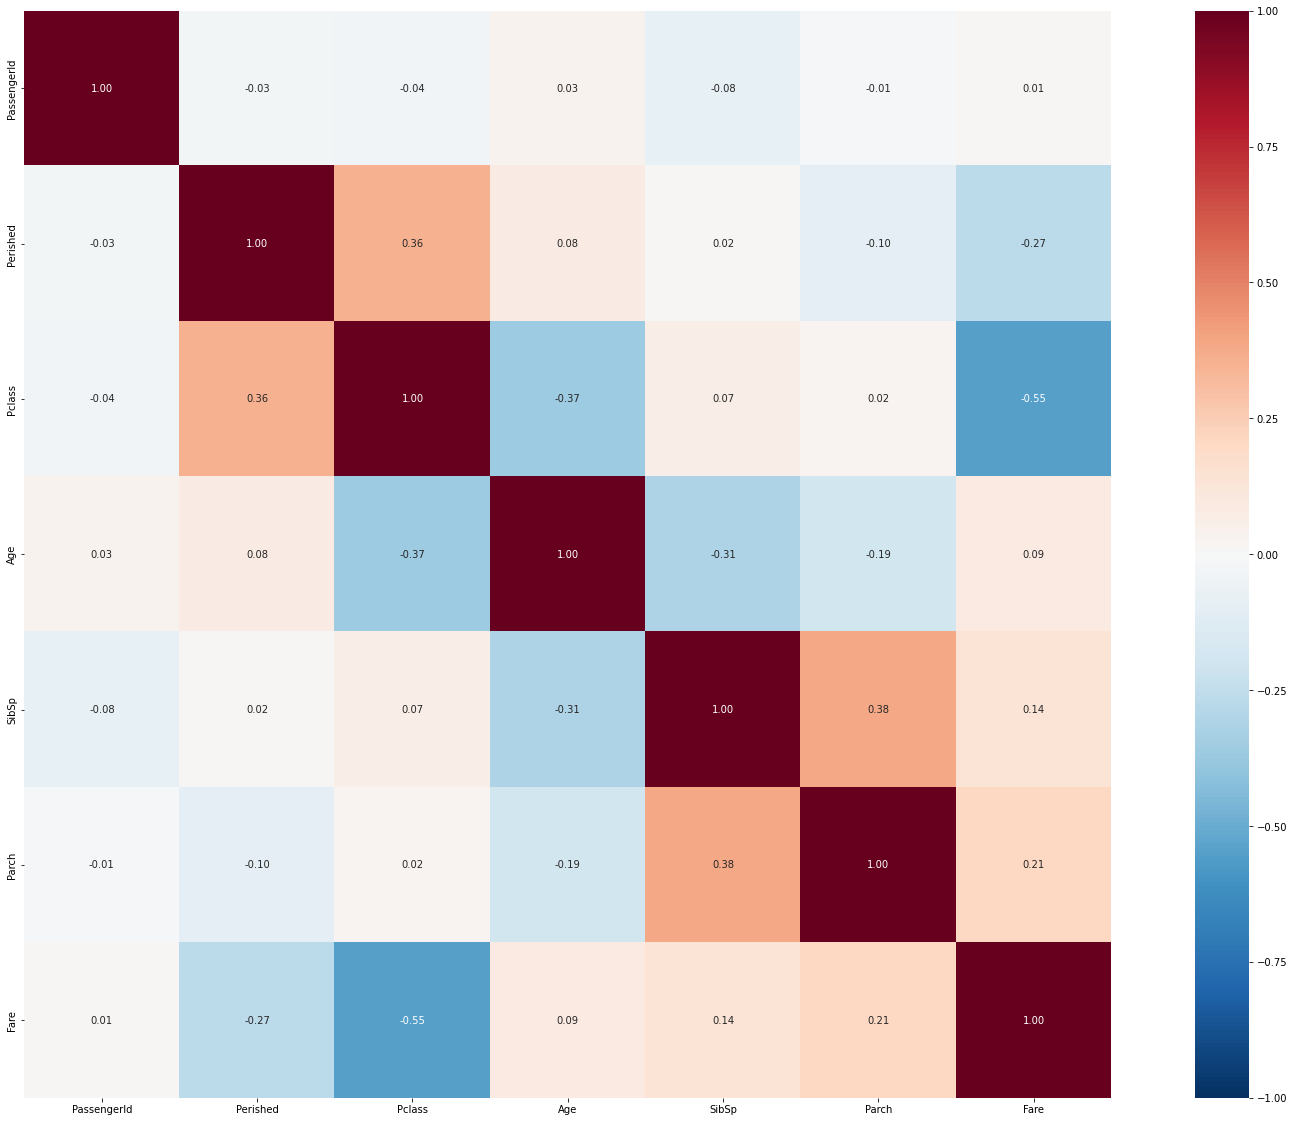

In [87]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat, cmap="RdBu_r", annot=True, fmt=".2f", vmax=1, vmin=-1, square=True);

In [92]:
# 説明変数と目的変数を指定

# 説明変数のデータを作る
X = train.loc[:, ["Parch", "SibSp"]].values

# 目的変数のデータを作る
y = train['Perished'].values

In [93]:
X,y

(array([[0, 1],
        [0, 1],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]),
 array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
 

In [105]:
# 決定木インスタンス(木の深さ3)
model = DecisionTreeClassifier(max_depth=3)
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [106]:
X1 = test.loc[:, ["Parch", "SibSp"]].values
X1

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 2],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [3, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 2],
       [0, 1],
       [0, 2],
       [2, 1],
       [2, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 0],
       [0, 1],
       [0, 0],
       [1, 2],
       [2, 3],
       [0, 0],
       [1, 4],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [0,

In [107]:
# モデルを使った予測値を出力
model.predict(X1)  #ここでテストデータにおける説明変数

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [112]:
index1 = test["PassengerId"]
index1

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [116]:
columns1 =["Perished"]

In [118]:
submission = pd.Series(data = model.predict(X1), index = index1)

In [119]:
submission.to_csv('/content/drive/MyDrive/プログラミング、AI/2022年前期東大講座/GCI/コンペ1/data/submission_pred.csv', header=True, index_label='id')